# Diamond Project

## Importaciones de librerias y exploración


In [31]:

%matplotlib inline

import numpy as np
import pandas as pd

import seaborn as sns
# El mantra de las visualizaciones
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')



from sklearn.model_selection import train_test_split as tts

from sklearn import metrics

from sklearn.linear_model import LinearRegression 

from sklearn.linear_model import Ridge, Lasso

from sklearn.linear_model import SGDRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.svm import SVR

In [32]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [33]:
train.sample(10)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
36323,36323,0.50,Fair,D,SI1,64.6,58.0,5.00,4.97,3.22,1323
31688,31688,0.31,Good,G,SI1,63.2,54.0,4.31,4.33,2.73,462
35437,35437,0.39,Ideal,G,VVS1,62.0,56.0,4.66,4.70,2.90,978
34965,34965,0.79,Ideal,F,SI1,62.8,56.0,5.88,5.90,3.70,2878
3696,3696,1.70,Ideal,I,SI1,62.9,57.0,7.57,7.50,4.74,9901
20468,20468,1.50,Very Good,D,VS1,60.2,59.0,7.30,7.36,4.41,15600
11447,11447,0.70,Fair,H,VVS2,64.5,65.0,5.52,5.45,3.54,2717
38192,38192,0.32,Ideal,E,VS2,62.0,55.0,4.38,4.36,2.71,900
10472,10472,0.92,Very Good,F,SI1,62.9,56.0,6.20,6.24,3.91,4037
7020,7020,0.38,Ideal,E,SI1,62.3,53.0,4.65,4.69,2.91,660


### Features
* id: only for test & sample submission files, id for prediction sample identification
* price: price in USD
* carat: weight of the diamond
* cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* color: diamond colour
* clarity: a measurement of how clear the diamond is
* x: length in mm
* y: width in mm
* z: depth in mm
* depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
* table: width of top of diamond relative to widest point (43--95)

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 3.4+ MB


In [35]:
train.describe()

,id,carat,depth,table,x,y,z,price
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,20227.000000,0.798406,61.744793,57.450157,5.733269,5.736107,3.539249,3939.026968
std,11678.496907,0.473424,1.430860,2.235814,1.120257,1.119260,0.693619,3995.017122
min,0.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,327.000000
25%,10113.500000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,949.000000
50%,20227.000000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2404.000000
75%,30340.500000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5331.000000
max,40454.000000,5.010000,79.000000,95.000000,10.740000,31.800000,6.980000,18818.000000


In [36]:
train.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [37]:
train.color.unique()

array(['G', 'H', 'F', 'J', 'E', 'I', 'D'], dtype=object)

 ![Imagen](../img/escala-colores-fancy.png)

In [38]:
cambia_color = {'G':4, 'H':5, 'F':3, 'J':7, 'E':2, 'I':6, 'D':1}

In [39]:
train.clarity.unique()

array(['VVS2', 'VS2', 'VS1', 'SI2', 'SI1', 'VVS1', 'IF', 'I1'],
      dtype=object)

 ![Imagen](../img/escala-gia-claridad-diamantes-1.jpg)

In [40]:
cambia_clarity = {'VVS2':3, 'VS2':5, 'VS1':4, 'SI2':7, 'SI1':6, 'VVS1':2, 'IF':1, 'I1':8}

In [41]:
train.cut.unique()

array(['Ideal', 'Fair', 'Very Good', 'Premium', 'Good'], dtype=object)

In [42]:
cambia_cut = {"Ideal":5, "Premium":4,"Very Good":3,"Good":2, "Fair":1}

In [43]:
train.color = train.color.replace(cambia_color)
train.clarity = train.clarity.replace(cambia_clarity)
train.cut = train.cut.replace(cambia_cut)

In [44]:
train.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.14,5,4,3,61.0,56.0,6.74,6.76,4.12,9013
1,1,0.76,5,5,5,62.7,57.0,5.86,5.82,3.66,2692
2,2,0.84,5,4,4,61.4,56.0,6.04,6.15,3.74,4372
3,3,1.55,5,5,4,62.0,57.0,7.37,7.43,4.59,13665
4,4,0.30,5,4,7,61.9,57.0,4.28,4.31,2.66,422


<AxesSubplot:>

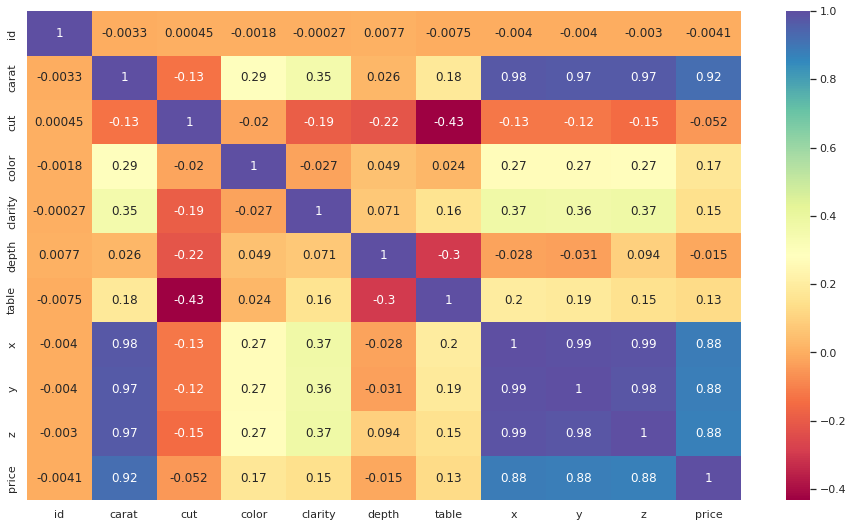

In [45]:
sns.heatmap(train.corr(),cmap="Spectral", annot= True)

In [46]:
train.shape

(40455, 11)

In [47]:
X = train.drop("price", axis=1)
X.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,1.14,5,4,3,61.0,56.0,6.74,6.76,4.12
1,1,0.76,5,5,5,62.7,57.0,5.86,5.82,3.66
2,2,0.84,5,4,4,61.4,56.0,6.04,6.15,3.74
3,3,1.55,5,5,4,62.0,57.0,7.37,7.43,4.59
4,4,0.30,5,4,7,61.9,57.0,4.28,4.31,2.66


In [48]:
y = train.price 
y.head()

0     9013
1     2692
2     4372
3    13665
4      422
Name: price, dtype: int64

## preparo el test

In [64]:
test.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,1.00,Fair,J,SI2,56.3,64.0,6.58,6.54,3.69
1,1,0.83,Premium,G,SI1,62.3,58.0,6.01,5.97,3.73
2,2,1.00,Fair,E,SI2,67.0,53.0,6.19,6.13,4.13
3,3,1.00,Fair,H,SI2,66.5,62.0,6.19,6.10,4.09
4,4,1.20,Very Good,I,SI1,62.6,57.0,6.74,6.77,4.23


In [65]:
test.color = test.color.replace(cambia_color)
test.clarity = test.clarity.replace(cambia_clarity)
test.cut = test.cut.replace(cambia_cut)

In [66]:
test.describe()

,id,carat,cut,color,clarity,depth,table,x,y,z
count,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000
mean,6742.000000,0.796541,3.907082,3.575380,4.957805,61.763241,57.478265,5.724821,5.729782,3.537188
std,3892.928525,0.475782,1.108828,1.705137,1.636252,1.437858,2.230467,1.126277,1.208193,0.740783
min,0.000000,0.200000,1.000000,1.000000,1.000000,44.000000,44.000000,0.000000,0.000000,0.000000
25%,3371.000000,0.400000,3.000000,2.000000,4.000000,61.100000,56.000000,4.710000,4.720000,2.910000
50%,6742.000000,0.700000,4.000000,4.000000,5.000000,61.900000,57.000000,5.690000,5.700000,3.520000
75%,10113.000000,1.040000,5.000000,5.000000,6.000000,62.500000,59.000000,6.530000,6.530000,4.030000
max,13484.000000,4.500000,5.000000,7.000000,8.000000,79.000000,73.000000,10.230000,58.900000,31.800000


In [67]:
X_test = test

In [49]:
X_train, X_test, y_train, y_test = tts(X,y, test_size=0.2)

In [50]:
models={
    'linear': LinearRegression(),
    'ridge': Ridge(),
    'lasso': Lasso(),
    'sgd': SGDRegressor(),
    'knn': KNeighborsRegressor(),
    'grad': GradientBoostingRegressor(),
}

In [51]:
for name, model in models.items():
    print("ENTRENANDO: ", name)
    model.fit(X_train, y_train)

ENTRENANDO:  linear
ENTRENANDO:  ridge
ENTRENANDO:  lasso
ENTRENANDO:  sgd
ENTRENANDO:  knn
ENTRENANDO:  grad


In [52]:
#Podemos seguir el mismo proceso para realizar predicciones de cada algoritmo y sacar métricas
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"------{name}------")
    print('MAE - ', metrics.mean_absolute_error(y_test, y_pred))
    print('MSE - ', metrics.mean_squared_error(y_test, y_pred))
    print('RMSE - ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R2 - ', metrics.r2_score(y_test, y_pred))

------linear------
MAE -  810.1024545953394
MSE -  1483639.1292716672
RMSE -  1218.047260688873
R2 -  0.9073374839019731
------ridge------
MAE -  810.5692604040344
MSE -  1483315.658449584
RMSE -  1217.9144709090142
R2 -  0.9073576866720856
------lasso------
MAE -  812.215952503851
MSE -  1483009.3359146751
RMSE -  1217.7887074179473
R2 -  0.9073768184247215
------sgd------
MAE -  3.372483542141649e+16
MSE -  1.5031357617715367e+33
RMSE -  3.877029483730471e+16
R2 -  -9.388020238523297e+25
------knn------
MAE -  2645.598442714127
MSE -  13871310.529264614
RMSE -  3724.4208313863533
R2 -  0.13365015126710544
------grad------
MAE -  344.21585054901436
MSE -  375016.6860273445
RMSE -  612.3860596285194
R2 -  0.9765778692268


En esta ocasion considero el mejor el grad, voy ha hacer una submision con el por el vacile, pero creo que se purede seguir rascando de los datos. 

In [60]:
grad = GradientBoostingRegressor()
grad

GradientBoostingRegressor()

Lo entreno con todos mis valores

In [63]:
grad.fit(X, y)

GradientBoostingRegressor()

In [69]:
y_pred = grad.predict(X_test)

In [78]:
y_pred

array([2865.05121414, 2986.57682568, 4096.58620544, ..., 7488.90448758,
        503.03151434, 1069.2388063 ])

In [79]:
mysub_1 = pd.DataFrame(y_pred)

In [81]:
mysub_1 = mysub_1.reset_index()

In [94]:
mysub_1.columns = ['id', 'price']

In [95]:
mysub_1.to_csv('../data/mysub_1.csv', index = False)

In [96]:
len(mysub_1)

13485

In [97]:
test.shape

(13485, 10)

In [57]:
help(GradientBoostingRegressor())

Help on GradientBoostingRegressor in module sklearn.ensemble._gb object:

class GradientBoostingRegressor(sklearn.base.RegressorMixin, BaseGradientBoosting)
 |  GradientBoostingRegressor(*, loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for regression.
 |  
 |  GB builds an additive model in a forward stage-wise fashion;
 |  it allows for the optimization of arbitrary differentiable loss functions.
 |  In each stage a regression tree is fit on the negative gradient of the
 |  given loss function.
 |  
 |  Read more in the :ref:`User Guide <gradient_boosting>`.
 |  
 |  Parameters
 |  ----------
 |  loss : {'squared_e

In [98]:
mysub_1.to_csv('mysub_1.csv', index = False)

In [99]:
kaggle competitions submit -c diamonds-datamad1021 -f mysub_1.csv -m "Message"

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2941092259.py, line 1)